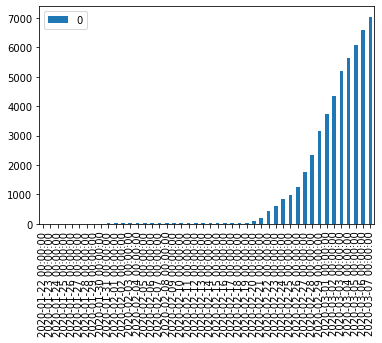

In [25]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon
from sys import path
path.insert(1,'SEIR/')
from SEIR import setup, seir
import datetime
import scipy.optimize
import matplotlib.pyplot as plt

s = setup.Setup(setup_name = 'midSD',
                spatial_setup = setup.CaliforniaSpatialSetup(),
                nsim = 5, 
                ti = datetime.date(2020, 1, 23),
                tf = datetime.date(2020, 4, 1))

seeding_place = 6075
seeding_amount = [3]
s.buildIC(seeding_places = [int(s.spatset.data[s.spatset.data['name'] == seeding_place].id)], 
          seeding_amount = seeding_amount)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
cases_data = pd.read_csv(url)

cases_data = cases_data[cases_data['Country/Region'].str.contains('Korea')].reset_index(drop=True)
cases_data = cases_data.T[4:]
cases_data.index = pd.to_datetime(cases_data.index)

cases_data.plot(kind='bar')

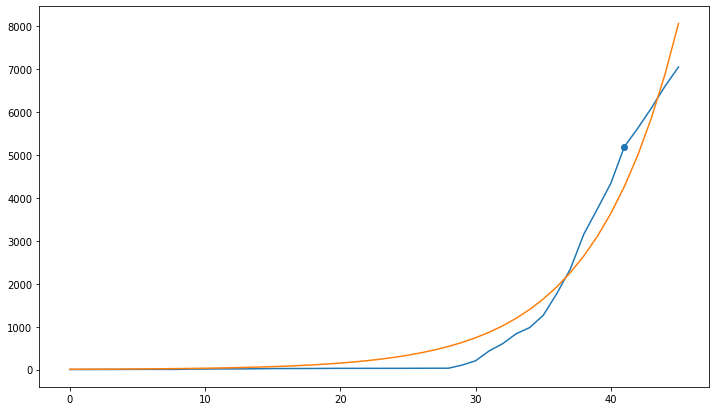

In [90]:
y = cases_data.to_numpy().flatten().astype(float)
x = np.arange(len(y)).astype(float)
exp_growth = lambda t,a,b: a*np.exp(b*t)
p_opt, p_cov = scipy.optimize.curve_fit(exp_growth,  x,  y)
fig, axes = plt.subplots(1,1, figsize = (12,7))
axes.plot(x,y)
axes.plot(x,exp_growth(x, p_opt[0], p_opt[1]))
inflexion_idx = 41
axes.scatter(inflexion_idx,y[inflexion_idx])

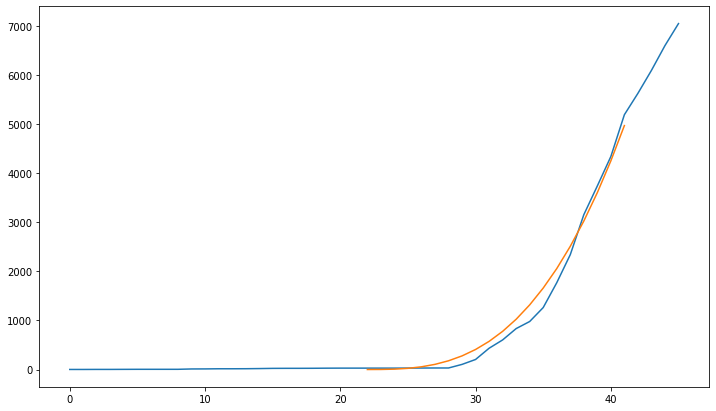

In [91]:
start = 22
exp_growth = lambda t,b: (t-start)**b

p_opt, p_cov = scipy.optimize.curve_fit(exp_growth,  x[start:inflexion_idx+1],  y[start:inflexion_idx+1])
fig, axes = plt.subplots(1,1, figsize = (12,7))
axes.plot(x,y)
axes.plot(x[start:inflexion_idx+1],exp_growth(x[start:inflexion_idx+1], p_opt[0]))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


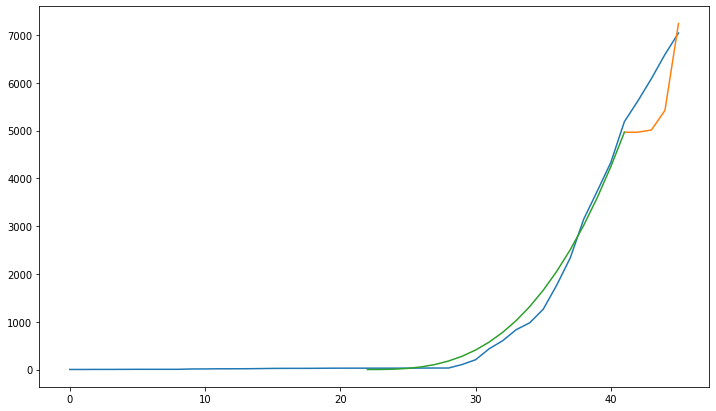

In [102]:
subexp_growth = lambda t,a: (x[inflexion_idx]-start)**p_opt[0] + (t-inflexion_idx)**a
p_opt2, p_cov2 = scipy.optimize.curve_fit(subexp_growth,  x[inflexion_idx:], y[inflexion_idx:], -0.5)
fig, axes = plt.subplots(1,1, figsize = (12,7))
axes.plot(x,y)
axes.plot(x[inflexion_idx:],subexp_growth(x[inflexion_idx:], p_opt2[0]))
axes.plot(x[:inflexion_idx+1],exp_growth(x[:inflexion_idx+1], p_opt[0]))

In [96]:
subexp_growth(x[inflexion_idx:],p_opt2)

array([4964.67876162, 4965.67876162, 5012.36744521, 5422.00420625,
       7238.8893035 ])

In [97]:
p_opt2

array([5.57557505])

In [44]:
a[:5]

array([0, 1, 2, 3, 4])

In [ ]:
I

In [105]:
import datetime, time

In [183]:
datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

'20200308-124034'